# Challenge 3: Artifical Neural Networks

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge-three.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Using Fully Connected Neural Networks and Convolutional Neural Networks, perform the following tasks on [this data set](https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST).
1. Data exploration.
2. For each architecture, tune the number of the hidden layers ($\le 3$), the optimizer, and some hyperparameters of your choice. How many tries to do is up to your discretion.
3. Summarise your results in a table and comment on them in the report.
4. For a model (not necessarily the best performing one), plot training loss vs testing loss and training accuracy vs testing accuracy, and comment on what you see.

## Data exploration

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [13]:
# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("-"*40)
print(f"Using {device} device")
print("-"*40)

----------------------------------------
Using cuda device
----------------------------------------


In [14]:
input_size = 784 # 28x28
num_classes = 10

learning_rate = 0.001
num_epochs = 10
batch_size = 128
learning_rate = 0.001

In [15]:
# Convert data to PyTorch tensor form

normalize = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0, 1)])


## download and load training dataset
train_dataset = torchvision.datasets.KMNIST(root='./data',
                                            train=True,
                                            download=True,
                                            transform=normalize)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

## download and load testing dataset
test_dataset = torchvision.datasets.KMNIST(root='./data',
                                           train=False,
                                           download=True,
                                           transform=normalize)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [16]:
# Batch exploration
examples = iter(train_loader)
example_images, example_targets = next(examples)

print("-"*60)
print("Dimnensions")
print(f"Image batch dimensions = {example_images.shape}")
print(f"Image batch dimensions = {example_images.shape}")

------------------------------------------------------------
Dimnensions
Image batch dimensions = torch.Size([128, 1, 28, 28])
Image batch dimensions = torch.Size([128, 1, 28, 28])


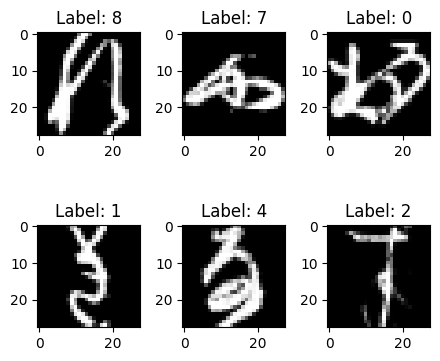

In [17]:
# Visualize some images
num_row = 2
num_col = 3

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_dataset.data[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_dataset.targets[i]))
plt.tight_layout()
plt.show("images.png")


In [18]:
def train_loop(train_loader, num_epochs, model, criterion, optimizer, step_lr_scheduler=None):
    # trining loop
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backaward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % (n_total_steps/2) == 0:
                print(f"epoch {epoch + 1} / {num_epochs} step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

        if step_lr_scheduler != None:
            step_lr_scheduler.step()

In [19]:
def accuracy_on_test(test_loader, model):
    # test
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)

            # value, index
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy = {acc}')

## Fully connected Neural Net

FCNN_1

In [20]:
class FCNN_1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FCNN_1, self).__init__()
        self.l1 = nn.Linear(input_size, 15)
        self.l2 = nn.Linear(15, 10)

    def forward(self, x):
        x = F.relu(self.l1(x))
        # no activation and no softmax at the end
        # output layer
        out = self.l2(x)
        return out

In [21]:
model_1 = FCNN_1(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

In [22]:
train_loop(train_loader, num_epochs, model_1, criterion, optimizer)

epoch 1 / 10 step 469/469, loss = 0.7025
epoch 2 / 10 step 469/469, loss = 0.4555
epoch 3 / 10 step 469/469, loss = 0.3477
epoch 4 / 10 step 469/469, loss = 0.5177
epoch 5 / 10 step 469/469, loss = 0.4655
epoch 6 / 10 step 469/469, loss = 0.3192
epoch 7 / 10 step 469/469, loss = 0.3424
epoch 8 / 10 step 469/469, loss = 0.4476
epoch 9 / 10 step 469/469, loss = 0.3733
epoch 10 / 10 step 469/469, loss = 0.5662


FCNN_2

In [29]:
class FCNN_2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FCNN_2, self).__init__()
        self.l1 = nn.Linear(input_size, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        # no activation and no softmax at the end
        # output layer
        out = self.l3(x)
        return out

In [31]:
model_2 = FCNN_2(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

In [32]:
train_loop(train_loader, num_epochs, model_2, criterion, optimizer)

epoch 1 / 10 step 469/469, loss = 0.7088
epoch 2 / 10 step 469/469, loss = 0.4992
epoch 3 / 10 step 469/469, loss = 0.2804
epoch 4 / 10 step 469/469, loss = 0.4906
epoch 5 / 10 step 469/469, loss = 0.2709
epoch 6 / 10 step 469/469, loss = 0.3523
epoch 7 / 10 step 469/469, loss = 0.4170
epoch 8 / 10 step 469/469, loss = 0.3190
epoch 9 / 10 step 469/469, loss = 0.3043
epoch 10 / 10 step 469/469, loss = 0.1162


FCNN_3

In [33]:
class FCNN_3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FCNN_3, self).__init__()
        self.l1 = nn.Linear(input_size, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, num_classes)


    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        # no activation and no softmax at the end
        # output layer
        out = self.l4(x)
        return out

In [34]:
model_3 = FCNN_3(input_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

In [35]:
train_loop(train_loader, num_epochs, model_3, criterion, optimizer)

epoch 1 / 10 step 469/469, loss = 0.1705
epoch 2 / 10 step 469/469, loss = 0.2006
epoch 3 / 10 step 469/469, loss = 0.0355
epoch 4 / 10 step 469/469, loss = 0.0871
epoch 5 / 10 step 469/469, loss = 0.1415
epoch 6 / 10 step 469/469, loss = 0.0516
epoch 7 / 10 step 469/469, loss = 0.0172
epoch 8 / 10 step 469/469, loss = 0.0079
epoch 9 / 10 step 469/469, loss = 0.0075
epoch 10 / 10 step 469/469, loss = 0.0773


In [37]:
model_3 = FCNN_3(input_size, num_classes).to(device)

# loss, optimizer and cheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

train_loop(train_loader, num_epochs, model_3, criterion, optimizer, step_lr_scheduler)

epoch 1 / 10 step 469/469, loss = 0.2924
epoch 2 / 10 step 469/469, loss = 0.2547
epoch 3 / 10 step 469/469, loss = 0.0838
epoch 4 / 10 step 469/469, loss = 0.1113
epoch 5 / 10 step 469/469, loss = 0.0481
epoch 6 / 10 step 469/469, loss = 0.0352
epoch 7 / 10 step 469/469, loss = 0.0117
epoch 8 / 10 step 469/469, loss = 0.0669
epoch 9 / 10 step 469/469, loss = 0.0115
epoch 10 / 10 step 469/469, loss = 0.0331


In [38]:
accuracy_on_test(test_loader, model_1)
accuracy_on_test(test_loader, model_2)
accuracy_on_test(test_loader, model_3)

Accuracy = 77.8
Accuracy = 81.7
Accuracy = 90.95


## Saveing and plot the result of model 3

In [39]:
def train(train_loader, model, loss_fn, optimizer, scheduler):

    # Total size of dataset for reference
    size = 0

    # places your model into training mode
    model.train()

    # loss batch
    batch_loss = {}
    batch_accuracy = {}

    correct = 0
    _correct = 0


    # Gives X , y for each batch
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # backaward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _correct = (outputs.argmax(1) == labels).type(torch.float).sum().item()
        _batch_size = len(images)

        correct += _correct

        # Updating loss_batch and batch_accuracy
        batch_loss[i] = loss.item()
        batch_accuracy[i] = _correct/_batch_size

        size += _batch_size

        if i % 100 == 0:
            loss, current = loss.item(), i * len(images)
            print(f"loss: {loss:>7f}  [{current:>5d}]")

    correct/=size
    step_lr_scheduler.step()
    print(f"Train Accuracy: {(100*correct):>0.1f}%")

    return batch_loss , batch_accuracy

In [40]:
def testing(dataloader, model, loss_fn):

    # Total size of dataset for reference
    size = 0
    num_batches = len(dataloader)

    # Setting the model under evaluation mode.
    model.eval()

    test_loss, correct = 0, 0

    _correct = 0
    _batch_size = 0

    batch_loss = {}
    batch_accuracy = {}

    with torch.no_grad():

        # Gives X , y for each batch
        for i , (images, labels) in enumerate(dataloader):

            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            model.to(device)
            pred = model(images)

            batch_loss[i] = loss_fn(pred, labels).item()
            test_loss += batch_loss[i]
            _batch_size = len(images)

            _correct = (pred.argmax(1) == labels).type(torch.float).sum().item()
            correct += _correct

            size+=_batch_size
            batch_accuracy[i] = _correct/_batch_size

    ## Calculating loss based on loss function defined
    test_loss /= num_batches

    ## Calculating Accuracy based on how many y match with y_pred
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return batch_loss , batch_accuracy

In [41]:
train_batch_loss = []
train_batch_accuracy = []
test_batch_accuracy = []
test_batch_loss = []
train_epoch_no = []
test_epoch_no = []

epochs = 15

model_3 = FCNN_3(input_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    _train_batch_loss , _train_batch_accuracy = train(train_loader, model_3, criterion, optimizer, step_lr_scheduler)
    _test_batch_loss , _test_batch_accuracy = testing(test_loader, model_3, criterion)
    for i in range(len(_train_batch_loss)):
        train_batch_loss.append(_train_batch_loss[i])
        train_batch_accuracy.append(_train_batch_accuracy[i])
        train_epoch_no.append( t + float((i+1)/len(_train_batch_loss)))
    for i in range(len(_test_batch_loss)):
        test_batch_loss.append(_test_batch_loss[i])
        test_batch_accuracy.append(_test_batch_accuracy[i])
        test_epoch_no.append( t + float((i+1)/len(_test_batch_loss)))
print("Done!")

Epoch 1
-------------------------------
loss: 2.309457  [    0]
loss: 0.653385  [12800]
loss: 0.448956  [25600]
loss: 0.372235  [38400]
loss: 0.232531  [51200]
Train Accuracy: 83.0%
Test Error: 
 Accuracy: 81.6%, Avg loss: 0.598397 

Epoch 2
-------------------------------
loss: 0.216338  [    0]
loss: 0.167677  [12800]
loss: 0.119279  [25600]
loss: 0.279374  [38400]
loss: 0.218968  [51200]
Train Accuracy: 92.9%
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.486309 

Epoch 3
-------------------------------
loss: 0.131990  [    0]
loss: 0.157262  [12800]
loss: 0.221272  [25600]
loss: 0.112567  [38400]
loss: 0.099053  [51200]
Train Accuracy: 95.5%
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.407287 

Epoch 4
-------------------------------
loss: 0.070227  [    0]
loss: 0.204861  [12800]
loss: 0.091027  [25600]
loss: 0.073356  [38400]
loss: 0.106478  [51200]
Train Accuracy: 96.8%
Test Error: 
 Accuracy: 89.3%, Avg loss: 0.391991 

Epoch 5
-------------------------------
loss: 0.021474  [    0]


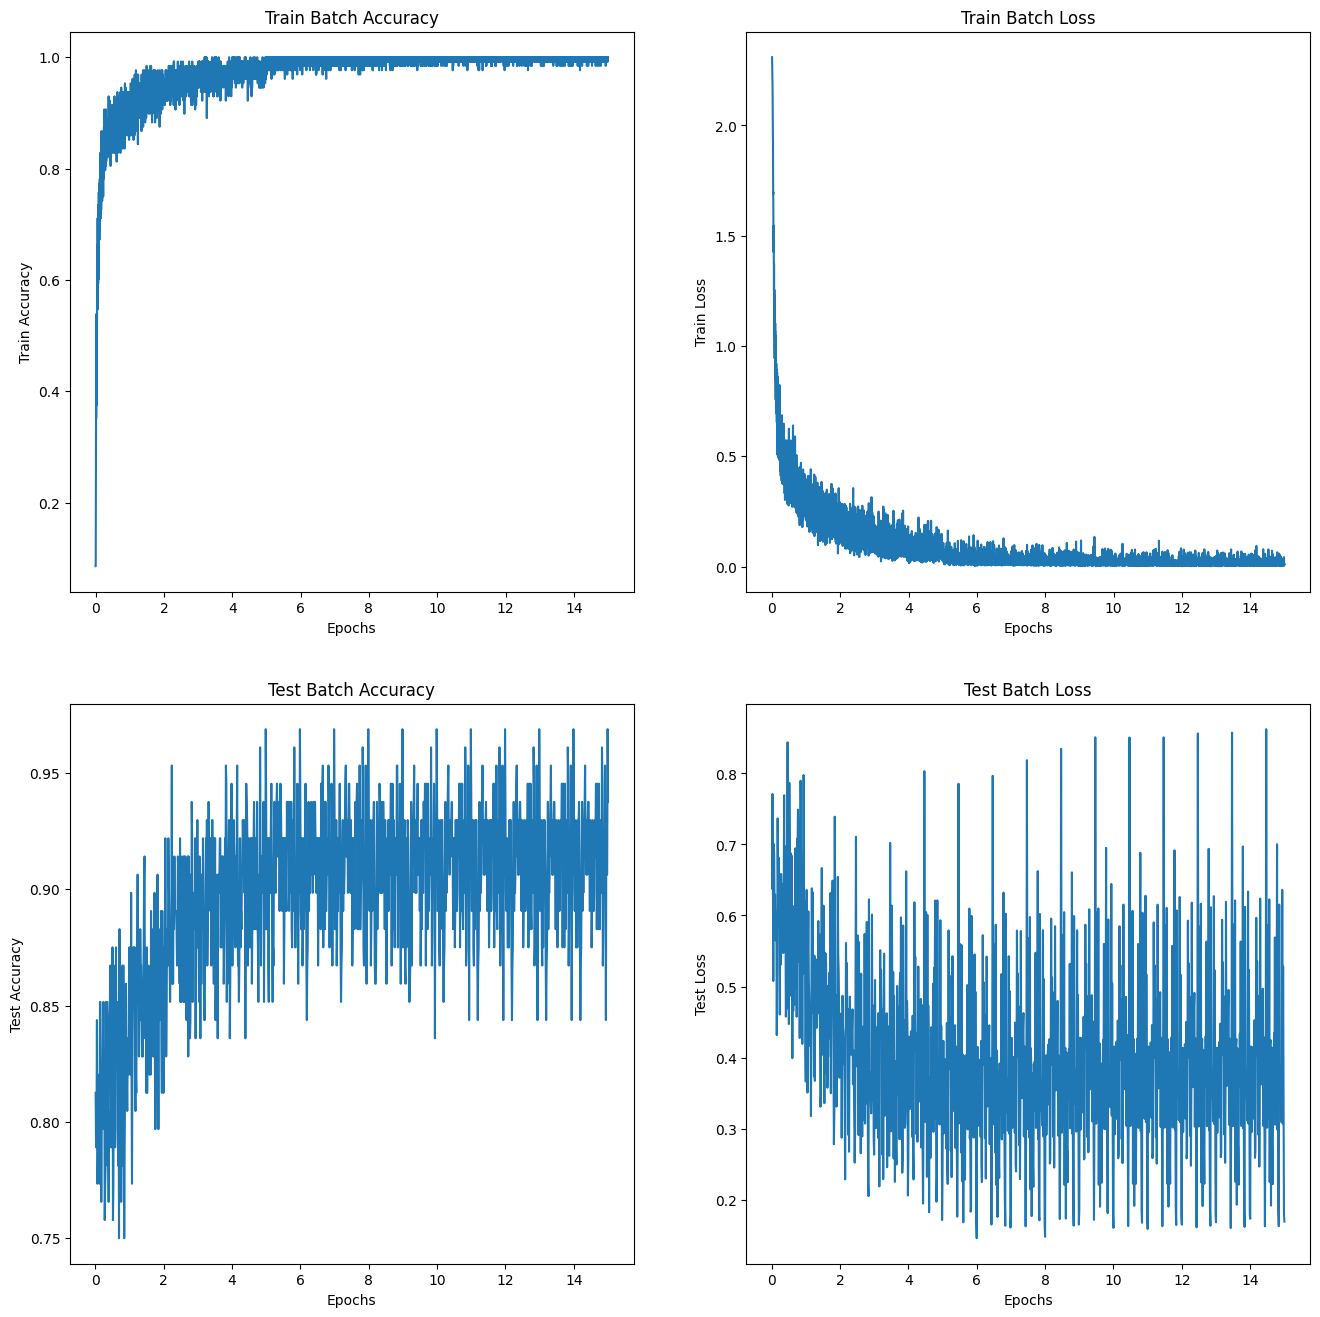

In [42]:
figure = plt.figure(figsize=(16, 16))

figure.add_subplot(2, 2, 1)
plt.plot(train_epoch_no , train_batch_accuracy)
plt.title("Train Batch Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

figure.add_subplot(2, 2, 2)
plt.plot(train_epoch_no , train_batch_loss)
plt.title("Train Batch Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")

figure.add_subplot(2, 2, 3)
plt.plot(test_epoch_no , test_batch_accuracy)
plt.title("Test Batch Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")

figure.add_subplot(2, 2, 4)
plt.plot(test_epoch_no , test_batch_loss)
plt.title("Test Batch Loss")
plt.xlabel("Epochs")
plt.ylabel("Test Loss")

plt.show()

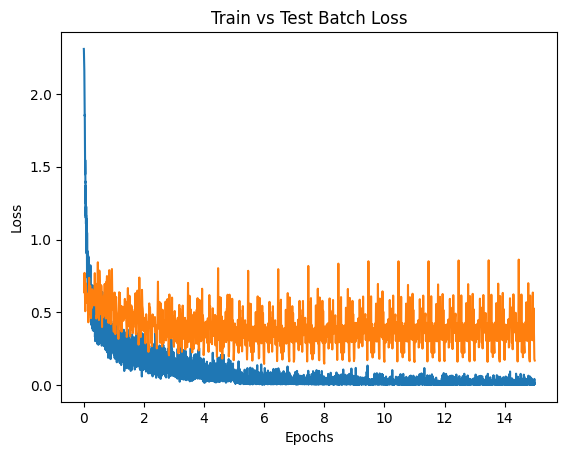

In [43]:
plt.plot(train_epoch_no , train_batch_loss)
plt.plot(test_epoch_no , test_batch_loss)
plt.title("Train vs Test Batch Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Convolutional NeuralNet

In [44]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1)
        self.l1 = nn.Linear(16*11*11, 10)

    def forward(self, x):
        # -> n, 1, 28, 28
        x = self.pool(F.relu(self.conv1(x)))        # -> n, 8, 13, 13
        x = F.relu(self.conv2(x))                   # -> n, 16, 11, 11
        x = x.view(-1, 16 * 11 * 11)                # -> n, 16x11x11
        # output
        out = self.l1(x)          # -> n, 10
        return out

In [45]:
def train_loop(train_loader, num_epochs, model, criterion, optimizer, scheduler=None):
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backword pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % (n_total_steps/2) == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss [{loss.item():.4f}]')

        if scheduler != None:
            step_lr_scheduler.step()

    print('Finished training')

In [47]:
def accuracy_on_test(test_loader, model):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # value, index
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy = {acc}')

In [46]:
cmodel_1 = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cmodel_1.parameters(), lr=learning_rate)

In [49]:
train_loop(train_loader, num_epochs, cmodel_1, criterion, optimizer)

Epoch [1/10], Step [469/469], Loss [0.4203]
Epoch [2/10], Step [469/469], Loss [0.3052]
Epoch [3/10], Step [469/469], Loss [0.2542]
Epoch [4/10], Step [469/469], Loss [0.0907]
Epoch [5/10], Step [469/469], Loss [0.0940]
Epoch [6/10], Step [469/469], Loss [0.2166]
Epoch [7/10], Step [469/469], Loss [0.0947]
Epoch [8/10], Step [469/469], Loss [0.1207]
Epoch [9/10], Step [469/469], Loss [0.2171]
Epoch [10/10], Step [469/469], Loss [0.1486]
Finished training


In [50]:
cmodel_2 = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cmodel_2.parameters(), lr=0.01)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [51]:
train_loop(train_loader, num_epochs, cmodel_2, criterion, optimizer, step_lr_scheduler)

Epoch [1/10], Step [469/469], Loss [0.2884]
Epoch [2/10], Step [469/469], Loss [0.2819]
Epoch [3/10], Step [469/469], Loss [0.2920]
Epoch [4/10], Step [469/469], Loss [0.0798]
Epoch [5/10], Step [469/469], Loss [0.0733]
Epoch [6/10], Step [469/469], Loss [0.0465]
Epoch [7/10], Step [469/469], Loss [0.0663]
Epoch [8/10], Step [469/469], Loss [0.0591]
Epoch [9/10], Step [469/469], Loss [0.0575]
Epoch [10/10], Step [469/469], Loss [0.0223]
Finished training


In [52]:
cmodel_3 = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cmodel_3.parameters(), lr=0.01, momentum=0.9)

In [53]:
train_loop(train_loader, num_epochs, cmodel_3, criterion, optimizer)

Epoch [1/10], Step [469/469], Loss [0.4484]
Epoch [2/10], Step [469/469], Loss [0.4440]
Epoch [3/10], Step [469/469], Loss [0.1671]
Epoch [4/10], Step [469/469], Loss [0.1097]
Epoch [5/10], Step [469/469], Loss [0.1059]
Epoch [6/10], Step [469/469], Loss [0.1020]
Epoch [7/10], Step [469/469], Loss [0.1472]
Epoch [8/10], Step [469/469], Loss [0.0500]
Epoch [9/10], Step [469/469], Loss [0.1565]
Epoch [10/10], Step [469/469], Loss [0.0658]
Finished training


In [54]:
accuracy_on_test(test_loader, cmodel_1)
accuracy_on_test(test_loader, cmodel_2)
accuracy_on_test(test_loader, cmodel_3)

Accuracy = 89.07
Accuracy = 91.96
Accuracy = 90.57
